# G+ project

# IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print ("Ready")

Ready


# Quick function to display value counts more nicely 

In [2]:
from IPython.display import HTML
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))

# Load the Dataset

In [3]:
url = "./Dataset/Candidate_test.csv" # Creating a path to the file

df = pd.read_csv (url, delimiter=",")

df.head() #Visualising

,Site_type,Date,Incident_area,Work_process,Dropped_Object_incident,Actual_consequence,High_Potential_Incident,Emergency_response_medical_evacuation,UK
0,Operation site,04/01/2016,Nacelle,Working with hand tools/power tools,Yes,Hazards,Yes,No,Yes
1,Project site,04/01/2016,Excavations & civil works,Manual handling,No,First Aid,No,No,Yes
2,Operation site,05/01/2016,Nacelle,O&M building maintenance,No,Hazards,Yes,No,Yes
3,Other - if activities cannot be covered by one...,05/01/2016,Administration,Office work,No,Hazards,Yes,No,No
4,Project site,05/01/2016,Installation vessel – heavy installations (WTG...,Maritime operations,No,Near Hits,No,No,No


In [4]:
df.tail()

,Site_type,Date,Incident_area,Work_process,Dropped_Object_incident,Actual_consequence,High_Potential_Incident,Emergency_response_medical_evacuation,UK
978,Operation site,NaN,CTV (Crew transfer vessel),Manual handling,No,Medical Treatment Injuries,No,No,No
979,Operation site,NaN,CTV (Crew transfer vessel),Transfer by vessel,No,Restricted Work Day,No,No,No
980,Operation Site,NaN,Turbine tower,Working at heights,Yes,Near Hits,No,No,Yes
981,Operation Site,NaN,Access ladders,Working at heights,No,Lost Work Day,No,No,Yes
982,Project site,NaN,SOV (Service operation vessel),Maritime operations,No,Medical Treatment Injuries,Yes,No,Yes


# Inspecting the data

In [5]:
print(df.shape)

(983, 9)


In [6]:
print(df.columns)

Index(['Site_type', 'Date', 'Incident_area', 'Work_process',
       'Dropped_Object_incident', 'Actual_consequence',
       'High_Potential_Incident', 'Emergency_response_medical_evacuation',
       'UK'],
      dtype='object')


In [7]:
print(df.dtypes)

Site_type                                object
Date                                     object
Incident_area                            object
Work_process                             object
Dropped_Object_incident                  object
Actual_consequence                       object
High_Potential_Incident                  object
Emergency_response_medical_evacuation    object
UK                                       object
dtype: object


# converting date format

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

/var/folders/_1/m8z38xzd6hv4d1hlr0776md00000gn/T/ipykernel_1350/2394721818.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [9]:
print(df.dtypes)

Site_type                                        object
Date                                     datetime64[ns]
Incident_area                                    object
Work_process                                     object
Dropped_Object_incident                          object
Actual_consequence                               object
High_Potential_Incident                          object
Emergency_response_medical_evacuation            object
UK                                               object
dtype: object


# Handling missing data

In [10]:
df.isna().sum()

Site_type                                0
Date                                     7
Incident_area                            0
Work_process                             0
Dropped_Object_incident                  0
Actual_consequence                       0
High_Potential_Incident                  0
Emergency_response_medical_evacuation    0
UK                                       3
dtype: int64

# IMPUTING EMPTY CELLS

In [11]:
from sklearn.impute import SimpleImputer 

imptr_empl = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')  
imptr_empl = imptr_empl.fit(df[['Date', 'UK']])

df[['Date', 'UK']] = imptr_empl.transform(df[['Date', 'UK']]) 



In [12]:
df.head()

,Site_type,Date,Incident_area,Work_process,Dropped_Object_incident,Actual_consequence,High_Potential_Incident,Emergency_response_medical_evacuation,UK
0,Operation site,2016-04-01,Nacelle,Working with hand tools/power tools,Yes,Hazards,Yes,No,Yes
1,Project site,2016-04-01,Excavations & civil works,Manual handling,No,First Aid,No,No,Yes
2,Operation site,2016-05-01,Nacelle,O&M building maintenance,No,Hazards,Yes,No,Yes
3,Other - if activities cannot be covered by one...,2016-05-01,Administration,Office work,No,Hazards,Yes,No,No
4,Project site,2016-05-01,Installation vessel – heavy installations (WTG...,Maritime operations,No,Near Hits,No,No,No


In [13]:
df.tail()

,Site_type,Date,Incident_area,Work_process,Dropped_Object_incident,Actual_consequence,High_Potential_Incident,Emergency_response_medical_evacuation,UK
978,Operation site,2016-07-06,CTV (Crew transfer vessel),Manual handling,No,Medical Treatment Injuries,No,No,No
979,Operation site,2016-07-06,CTV (Crew transfer vessel),Transfer by vessel,No,Restricted Work Day,No,No,No
980,Operation Site,2016-07-06,Turbine tower,Working at heights,Yes,Near Hits,No,No,Yes
981,Operation Site,2016-07-06,Access ladders,Working at heights,No,Lost Work Day,No,No,Yes
982,Project site,2016-07-06,SOV (Service operation vessel),Maritime operations,No,Medical Treatment Injuries,Yes,No,Yes


In [14]:
df.isna().sum()

Site_type                                0
Date                                     0
Incident_area                            0
Work_process                             0
Dropped_Object_incident                  0
Actual_consequence                       0
High_Potential_Incident                  0
Emergency_response_medical_evacuation    0
UK                                       0
dtype: int64

# Checking for Duplicates

In [15]:
number_of_duplicated_rows = df.duplicated().sum()

print("Number of duplicated rows:", number_of_duplicated_rows)

Number of duplicated rows: 21


In [16]:
print (df.shape)

(983, 9)


# Lets View the Data

In [17]:
df.head()

,Site_type,Date,Incident_area,Work_process,Dropped_Object_incident,Actual_consequence,High_Potential_Incident,Emergency_response_medical_evacuation,UK
0,Operation site,2016-04-01,Nacelle,Working with hand tools/power tools,Yes,Hazards,Yes,No,Yes
1,Project site,2016-04-01,Excavations & civil works,Manual handling,No,First Aid,No,No,Yes
2,Operation site,2016-05-01,Nacelle,O&M building maintenance,No,Hazards,Yes,No,Yes
3,Other - if activities cannot be covered by one...,2016-05-01,Administration,Office work,No,Hazards,Yes,No,No
4,Project site,2016-05-01,Installation vessel – heavy installations (WTG...,Maritime operations,No,Near Hits,No,No,No


# Lets view Each rows for distinct values

In [18]:
incident_columns= ['Site_type', 'Incident_area', 'Work_process',
       'Dropped_Object_incident', 'Actual_consequence',
       'High_Potential_Incident', 'Emergency_response_medical_evacuation',
       'UK'  ]

# let's get the categories and their count for each feature
for col in incident_columns:
  print(f"Categories and number of occurrences / Distinct vales for '{col}'")
  pretty_print_df(df[col].value_counts())
  print()

Categories and number of occurrences / Distinct vales for 'Site_type'


,Site_type
Operation site,576
Project site,349
Operation Site,48
Other - if activities cannot be covered by one of the other site types,6
Survey Phase,3
Survey phase,1



Categories and number of occurrences / Distinct vales for 'Incident_area'


,Incident_area
CTV (Crew transfer vessel),134
Nacelle,99
Turbine tower,93
Transition piece area,92
"Installation vessel – heavy installations (WTG, foundations, offshore substation)",56
Warehouse,46
"Harbour, quay and pontoons",40
Excavations & civil works,36
Substation work and cable areas,36
Hub and blades,33



Categories and number of occurrences / Distinct vales for 'Work_process'


,Work_process
Working at heights,136
Lifting operations,126
Transfer by vessel,99
Manual handling,79
Operating plant and machinery,74
Maritime operations,64
Other - if activities cannot be covered by one of the other work processes,59
O&M building maintenance,59
"Working on energized systems (electrical, hydraulical, pneumatic)",47
Civil works,37



Categories and number of occurrences / Distinct vales for 'Dropped_Object_incident'


,Dropped_Object_incident
No,848
Yes,85
NO,26
no,24



Categories and number of occurrences / Distinct vales for 'Actual_consequence'


,Actual_consequence
Hazards,535
Near Hits,214
First Aid,62
Near hits,56
Medical Treatment Injuries,42
Lost Work Day,41
Restricted Work Day,33



Categories and number of occurrences / Distinct vales for 'High_Potential_Incident'


,High_Potential_Incident
No,601
Yes,331
NO,31
no,16
YES,4



Categories and number of occurrences / Distinct vales for 'Emergency_response_medical_evacuation'


,Emergency_response_medical_evacuation
No,918
NO,42
Yes,17
no,5
nO,1



Categories and number of occurrences / Distinct vales for 'UK'


,UK
Yes,735
No,248


# Now let us correct some issues with the data

In [19]:
# Site Types
df.loc[df.Site_type=='Operation Site','Site_type'] = 'Operation site'
df.loc[df.Site_type=='Survey Phase','Site_type'] = 'Survey phase'
df.loc[df.Site_type=='Other - if activities cannot be covered by one of the other site types','Site_type'] = 'Others'

In [20]:
# Incident_area
df.loc[df.Site_type=='Turbine Tower','Site_type'] = 'Turbine tower'


In [21]:
# Work_process
df.loc[df.Work_process=='lifting operations','Work_process'] = 'Lifting operations'

In [22]:
# Dropped_Object_incident?
df.loc[df.Dropped_Object_incident=='NO','Dropped_Object_incident'] = 'No'
df.loc[df.Dropped_Object_incident=='no','Dropped_Object_incident'] = 'No'


In [23]:
# Actual_consequence
df.loc[df.Actual_consequence=='Near hits','Actual_consequence'] = 'Near Hits'

In [24]:
# High_Potential_Incident
df.loc[df.High_Potential_Incident=='no','High_Potential_Incident'] = 'No'
df.loc[df.High_Potential_Incident=='NO','High_Potential_Incident'] = 'No'
df.loc[df.High_Potential_Incident=='YES','High_Potential_Incident'] = 'Yes'

In [25]:
# Emergency_response_medical_evacuation
df.loc[df.Emergency_response_medical_evacuation=='NO','Emergency_response_medical_evacuation'] = 'No'
df.loc[df.Emergency_response_medical_evacuation=='no','Emergency_response_medical_evacuation'] = 'No'
df.loc[df.Emergency_response_medical_evacuation=='nO','Emergency_response_medical_evacuation'] = 'No'

# Now lets view it again

In [26]:
incident_columns= ['Site_type', 'Incident_area', 'Work_process',
       'Dropped_Object_incident', 'Actual_consequence',
       'High_Potential_Incident', 'Emergency_response_medical_evacuation',
       'UK'  ]

# let's get the categories and their count for each feature
for col in incident_columns:
  print(f"Categories and number of occurrences / Distinct vales for '{col}'")
  pretty_print_df(df[col].value_counts())
  print()

Categories and number of occurrences / Distinct vales for 'Site_type'


,Site_type
Operation site,624
Project site,349
Others,6
Survey phase,4



Categories and number of occurrences / Distinct vales for 'Incident_area'


,Incident_area
CTV (Crew transfer vessel),134
Nacelle,99
Turbine tower,93
Transition piece area,92
"Installation vessel – heavy installations (WTG, foundations, offshore substation)",56
Warehouse,46
"Harbour, quay and pontoons",40
Excavations & civil works,36
Substation work and cable areas,36
Hub and blades,33



Categories and number of occurrences / Distinct vales for 'Work_process'


,Work_process
Working at heights,136
Lifting operations,132
Transfer by vessel,99
Manual handling,79
Operating plant and machinery,74
Maritime operations,64
O&M building maintenance,59
Other - if activities cannot be covered by one of the other work processes,59
"Working on energized systems (electrical, hydraulical, pneumatic)",47
Civil works,37



Categories and number of occurrences / Distinct vales for 'Dropped_Object_incident'


,Dropped_Object_incident
No,898
Yes,85



Categories and number of occurrences / Distinct vales for 'Actual_consequence'


,Actual_consequence
Hazards,535
Near Hits,270
First Aid,62
Medical Treatment Injuries,42
Lost Work Day,41
Restricted Work Day,33



Categories and number of occurrences / Distinct vales for 'High_Potential_Incident'


,High_Potential_Incident
No,648
Yes,335



Categories and number of occurrences / Distinct vales for 'Emergency_response_medical_evacuation'


,Emergency_response_medical_evacuation
No,966
Yes,17



Categories and number of occurrences / Distinct vales for 'UK'


,UK
Yes,735
No,248


##### Now it is looking better

In [27]:
df.head()

,Site_type,Date,Incident_area,Work_process,Dropped_Object_incident,Actual_consequence,High_Potential_Incident,Emergency_response_medical_evacuation,UK
0,Operation site,2016-04-01,Nacelle,Working with hand tools/power tools,Yes,Hazards,Yes,No,Yes
1,Project site,2016-04-01,Excavations & civil works,Manual handling,No,First Aid,No,No,Yes
2,Operation site,2016-05-01,Nacelle,O&M building maintenance,No,Hazards,Yes,No,Yes
3,Others,2016-05-01,Administration,Office work,No,Hazards,Yes,No,No
4,Project site,2016-05-01,Installation vessel – heavy installations (WTG...,Maritime operations,No,Near Hits,No,No,No


# LETS CREATE A REGION COLUMN

In [28]:
UK = ['Yes']  
EU = ['No'] 

In [29]:
df['Region'] = df['UK'].apply(lambda x: 'UK' if x in UK else 'EU')

# Display the DataFrame
df.head()

,Site_type,Date,Incident_area,Work_process,Dropped_Object_incident,Actual_consequence,High_Potential_Incident,Emergency_response_medical_evacuation,UK,Region
0,Operation site,2016-04-01,Nacelle,Working with hand tools/power tools,Yes,Hazards,Yes,No,Yes,UK
1,Project site,2016-04-01,Excavations & civil works,Manual handling,No,First Aid,No,No,Yes,UK
2,Operation site,2016-05-01,Nacelle,O&M building maintenance,No,Hazards,Yes,No,Yes,UK
3,Others,2016-05-01,Administration,Office work,No,Hazards,Yes,No,No,EU
4,Project site,2016-05-01,Installation vessel – heavy installations (WTG...,Maritime operations,No,Near Hits,No,No,No,EU


# EXPORTING THE DATASET

In [32]:
df.to_csv('Candidate_Incident_New_Data.csv', index=False)

In [30]:
Safe_incident = ['Hazards', 'Near Hits', 'First Aid']  
Unsafe_incident = ['Medical Treatment Injuries', 'Lost Work Day', 'Restricted Work Day'] 

In [31]:
df['Status'] = df['Actual_consequence'].apply(lambda x: 'Non Serious incident' if x in Safe_incident else 'Serious incident')

# Display the DataFrame
df.head()

,Site_type,Date,Incident_area,Work_process,Dropped_Object_incident,Actual_consequence,High_Potential_Incident,Emergency_response_medical_evacuation,UK,Region,Status
0,Operation site,2016-04-01,Nacelle,Working with hand tools/power tools,Yes,Hazards,Yes,No,Yes,UK,Non Serious incident
1,Project site,2016-04-01,Excavations & civil works,Manual handling,No,First Aid,No,No,Yes,UK,Non Serious incident
2,Operation site,2016-05-01,Nacelle,O&M building maintenance,No,Hazards,Yes,No,Yes,UK,Non Serious incident
3,Others,2016-05-01,Administration,Office work,No,Hazards,Yes,No,No,EU,Non Serious incident
4,Project site,2016-05-01,Installation vessel – heavy installations (WTG...,Maritime operations,No,Near Hits,No,No,No,EU,Non Serious incident


In [33]:
df.to_csv('Candidate_Incident_UPDATED.csv', index=False)

# ENCODING CATEGORICAL DATA

In [36]:
from sklearn.preprocessing import LabelEncoder

# Create a label (category) encoder object
le_site_type = LabelEncoder()

le_site_type.fit(df['Site_type'])

# View the labels (if you wish)
list(le_site_type.classes_)

# Apply the fitted encoder to the pandas column
df['site_type'] = le_site_type.transform(df['Site_type']) 

In [37]:
# Create a label (category) encoder object
le_Incident_area = LabelEncoder()

le_Incident_area.fit(df['Incident_area'])

# View the labels (if you wish)
list(le_Incident_area.classes_)

# Apply the fitted encoder to the pandas column
df['Incident_Area'] = le_Incident_area.transform(df['Incident_area']) 

In [38]:
# Create a label (category) encoder object
le_Work_process = LabelEncoder()

le_Work_process.fit(df['Work_process'])

# View the labels (if you wish)
list(le_Work_process.classes_)

# Apply the fitted encoder to the pandas column
df['Work_Process'] = le_Work_process.transform(df['Work_process']) 

In [39]:
# Create a label (category) encoder object
le_Dropped_Object_incident = LabelEncoder()

le_Dropped_Object_incident.fit(df['Dropped_Object_incident'])

# View the labels (if you wish)
list(le_Dropped_Object_incident.classes_)

# Apply the fitted encoder to the pandas column
df['Dropped_Object_Incident'] = le_Dropped_Object_incident.transform(df['Dropped_Object_incident']) 

In [40]:
# Create a label (category) encoder object
le_High_Potential_Incident = LabelEncoder()

le_High_Potential_Incident.fit(df['High_Potential_Incident'])

# View the labels (if you wish)
list(le_High_Potential_Incident.classes_)

# Apply the fitted encoder to the pandas column
df['high_potential_incident'] = le_High_Potential_Incident.transform(df['High_Potential_Incident']) 

In [41]:
# Create a label (category) encoder object
le_Region = LabelEncoder()

le_Region.fit(df['Region'])

# View the labels (if you wish)
list(le_Region.classes_)

# Apply the fitted encoder to the pandas column
df['region'] = le_Region.transform(df['Region']) 

In [42]:
df.head()

,Site_type,Date,Incident_area,Work_process,Dropped_Object_incident,Actual_consequence,High_Potential_Incident,Emergency_response_medical_evacuation,UK,Region,Status,site_type,Incident_Area,Work_Process,Dropped_Object_Incident,high_potential_incident,region
0,Operation site,2016-04-01,Nacelle,Working with hand tools/power tools,Yes,Hazards,Yes,No,Yes,UK,Non Serious incident,0,21,25,1,1,1
1,Project site,2016-04-01,Excavations & civil works,Manual handling,No,First Aid,No,No,Yes,UK,Non Serious incident,2,11,6,0,0,1
2,Operation site,2016-05-01,Nacelle,O&M building maintenance,No,Hazards,Yes,No,Yes,UK,Non Serious incident,0,21,8,0,1,1
3,Others,2016-05-01,Administration,Office work,No,Hazards,Yes,No,No,EU,Non Serious incident,1,4,9,0,1,0
4,Project site,2016-05-01,Installation vessel – heavy installations (WTG...,Maritime operations,No,Near Hits,No,No,No,EU,Non Serious incident,2,19,7,0,0,0


# CLASS DISTRIBUTION

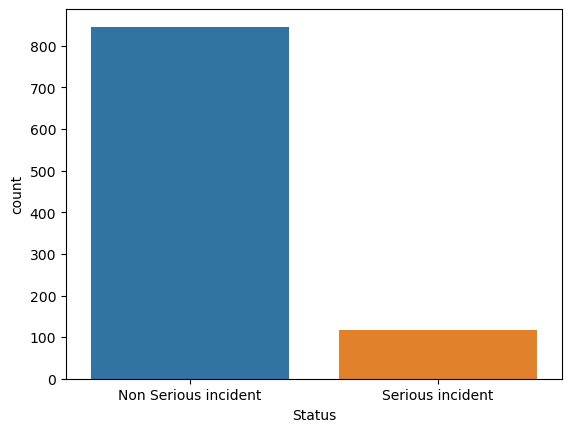

In [43]:
# Visualize class distribution
sns.countplot(x='Status', data=df)
plt.show()

# FEATURE EXTRATION

In [44]:
X = df[[ "site_type", "Incident_Area", "Work_Process", "Dropped_Object_Incident", 
                  "high_potential_incident", "region"]]

y= df["Status"]


# SCALING

In [45]:
from sklearn.preprocessing import StandardScaler

# create an instance of StandardScaler
scaler = StandardScaler()

# fit the scaler to the training data and transform it
X_scaled = scaler.fit_transform(X)

# TRAIN TEST SPLIT

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=42)

# FIXING CLASS IMBALANCE

In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

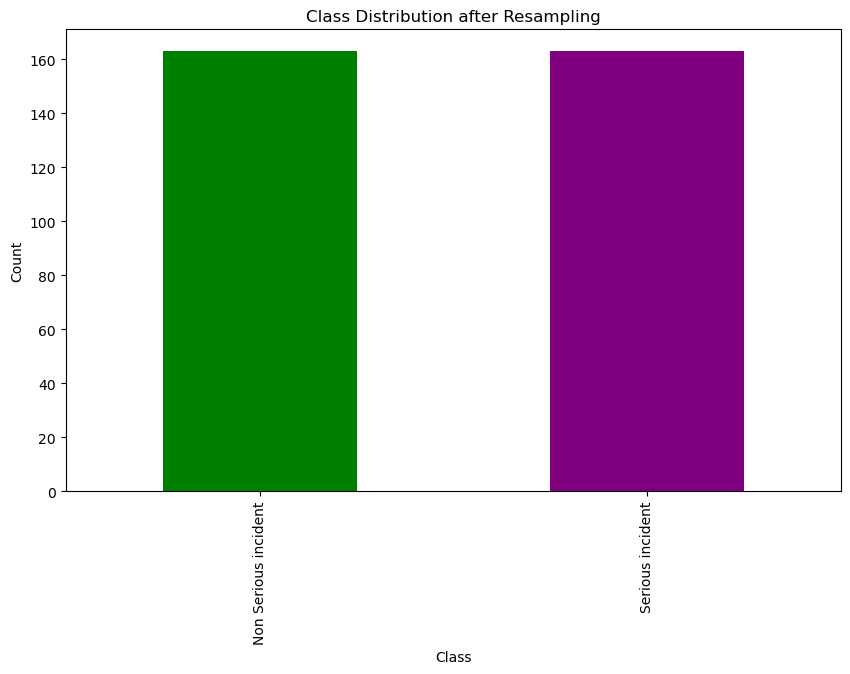

In [48]:
import matplotlib.pyplot as plt

# Get the class distribution of the resampled data
class_distribution = y_resampled.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color=['green', 'purple'])
plt.title('Class Distribution after Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# CLASSIFICATION

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Calculating the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    print("Classification Report:\n", classification_report(y_test, y_pred))

 

    # Create confusion matrix and display it as a heatmap
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


# RF

In [50]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
warnings.simplefilter("ignore")

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # minimum number of samples required to be at a leaf node
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=3, n_jobs=-1, verbose=2, scoring='f1_macro')

# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Accuracy: 0.8155844155844156
Precision: 0.8408812218919417
Recall: 0.8155844155844156
F1 Score: 0.827073850770575
Classification Report:
                       precision    recall  f1-score   support

Non Serious incident       0.91      0.87      0.89       683
    Serious incident       0.26      0.36      0.30        87

            accuracy                           0.82       770
           macro avg       0.59      0.62      0.60       770
        weighted avg       0.84      0.82      0.83       770



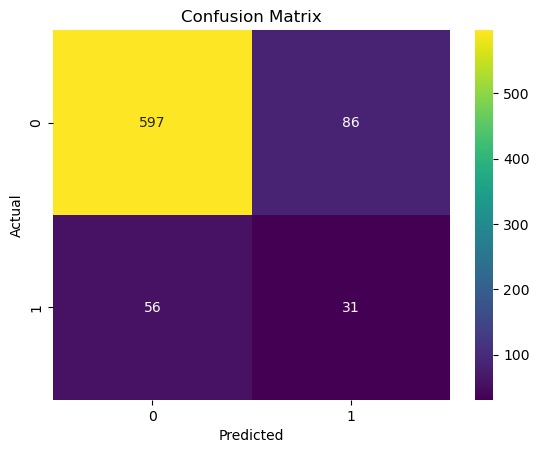

In [51]:
# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate its performance
evaluate_model_performance(best_rf, X_test, y_test)

# SAVING MODEL

In [52]:
import pickle

In [53]:
data = {"model": grid_search.best_estimator_, "le_site_type": le_site_type, "le_Incident_area": le_Incident_area, "le_Work_process":le_Work_process, "le_Dropped_Object_incident":le_Dropped_Object_incident, "le_High_Potential_Incident":le_High_Potential_Incident, "le_Region":le_Region}
with open('Random_forest.pkl', 'wb') as file:
    pickle.dump(data, file)

In [58]:
df.head()

,Site_type,Date,Incident_area,Work_process,Dropped_Object_incident,Actual_consequence,High_Potential_Incident,Emergency_response_medical_evacuation,UK,Region,Status,site_type,Incident_Area,Work_Process,Dropped_Object_Incident,high_potential_incident,region
0,Operation site,2016-04-01,Nacelle,Working with hand tools/power tools,Yes,Hazards,Yes,No,Yes,UK,Non Serious incident,0,21,25,1,1,1
1,Project site,2016-04-01,Excavations & civil works,Manual handling,No,First Aid,No,No,Yes,UK,Non Serious incident,2,11,6,0,0,1
2,Operation site,2016-05-01,Nacelle,O&M building maintenance,No,Hazards,Yes,No,Yes,UK,Non Serious incident,0,21,8,0,1,1
3,Others,2016-05-01,Administration,Office work,No,Hazards,Yes,No,No,EU,Non Serious incident,1,4,9,0,1,0
4,Project site,2016-05-01,Installation vessel – heavy installations (WTG...,Maritime operations,No,Near Hits,No,No,No,EU,Non Serious incident,2,19,7,0,0,0


In [57]:
df['Incident_area'].unique()


array(['Nacelle', 'Excavations & civil works', 'Administration',
       'Installation vessel – heavy installations (WTG, foundations, offshore substation)',
       'Foundation external (excluding boatlanding and TP)',
       'Harbour, quay and pontoons',
       'Helicopter hoisting and landing area', 'Access roads',
       'Public road/area', 'Office', 'Vessel – other', 'Yaw gear space',
       'Transition piece area', 'Turbine tower', 'Warehouse',
       'CTV (Crew transfer vessel)', 'Substation work and cable areas',
       'Turbine assembly area', 'Car park', 'Access ladders',
       'Boatlanding', 'Hub and blades', 'Turbine Tower', 'Workshop',
       'Foundation internal', 'Storage', 'Survey vessel',
       'Company vehicle', 'Accommodation platform',
       'Accommodation vessel', 'Tug',
       'Installation vessel – cables (array, export)',
       'Turbine/substation outside (not dedicated work areas)', 'Barge',
       'Diving vessel', 'Kitchen & canteen',
       'Other - if acti

In [59]:
df['Work_process'].unique()

array(['Working with hand tools/power tools', 'Manual handling',
       'O&M building maintenance', 'Office work', 'Maritime operations',
       'Working at heights', 'Transfer by helicopter',
       'Operating plant and machinery',
       'Vessel operation (including jack-ups and barges)',
       'Lifting operations',
       'Working on energized systems (electrical, hydraulical, pneumatic)',
       'Civil works',
       'Other - if activities cannot be covered by one of the other work processes',
       'Transfer by vessel', 'Vessel mobilization',
       'Working with chemicals and hazardous substances',
       'Transit (vessel)', 'Training/drills/team building events',
       'Business travels',
       'Surveys (geophysical, environmental, meteorological)',
       'Rigging/slinging', 'Working in confined spaces',
       'Catering/cleaning', 'Replacing major components', 'Hot works',
       'Diving operations'], dtype=object)

In [60]:
df['Dropped_Object_incident'].unique()

array(['Yes', 'No'], dtype=object)